In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('comprehensive_mutual_funds_data_1.csv')
dataset['sortino'].replace('-', np.nan, inplace=True)
median=dataset['sortino'].median()
dataset['sortino'].fillna(median, inplace=True)
dataset['alpha'].replace('-', np.nan, inplace=True)
median1=dataset['alpha'].median()
dataset['alpha'].fillna(median1, inplace=True)
dataset['sd'].replace('-', np.nan, inplace=True)
median2=dataset['sd'].median()
dataset['sd'].fillna(median2, inplace=True)
dataset['beta'].replace('-', np.nan, inplace=True)
median3=dataset['beta'].median()
dataset['beta'].fillna(median3, inplace=True)
dataset['sharpe'].replace('-', np.nan, inplace=True)
median4=dataset['sharpe'].median()
dataset['sharpe'].fillna(median4, inplace=True)

In [3]:
encode={'Debt':0, 'Equity':1, 'Hybrid':2, 'Solution Oriented':3, 'Other':4}
dataset['category']=dataset['category'].map(encode)

In [4]:
dataset.to_csv('comprehensive_mutual_funds_data_1.csv')

In [5]:
dataset['sortino']=dataset['sortino'].astype(float)
dataset['alpha']=dataset['alpha'].astype(float)
dataset['sd']=dataset['sd'].astype(float)
dataset['beta']=dataset['beta'].astype(float)
dataset['sharpe']=dataset['sharpe'].astype(float)

In [6]:
median5 = dataset['returns_3yr'].median()
dataset['returns_3yr'].fillna(median5, inplace=True)
median6 = dataset['returns_5yr'].median()
dataset['returns_5yr'].fillna(median6, inplace=True)

In [7]:
dataset.to_csv('comprehensive_mutual_funds_data_1.csv')

C:\Users\vinay\AppData\Local\Temp\ipykernel_10192\3766593610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, linewidth=0.9)


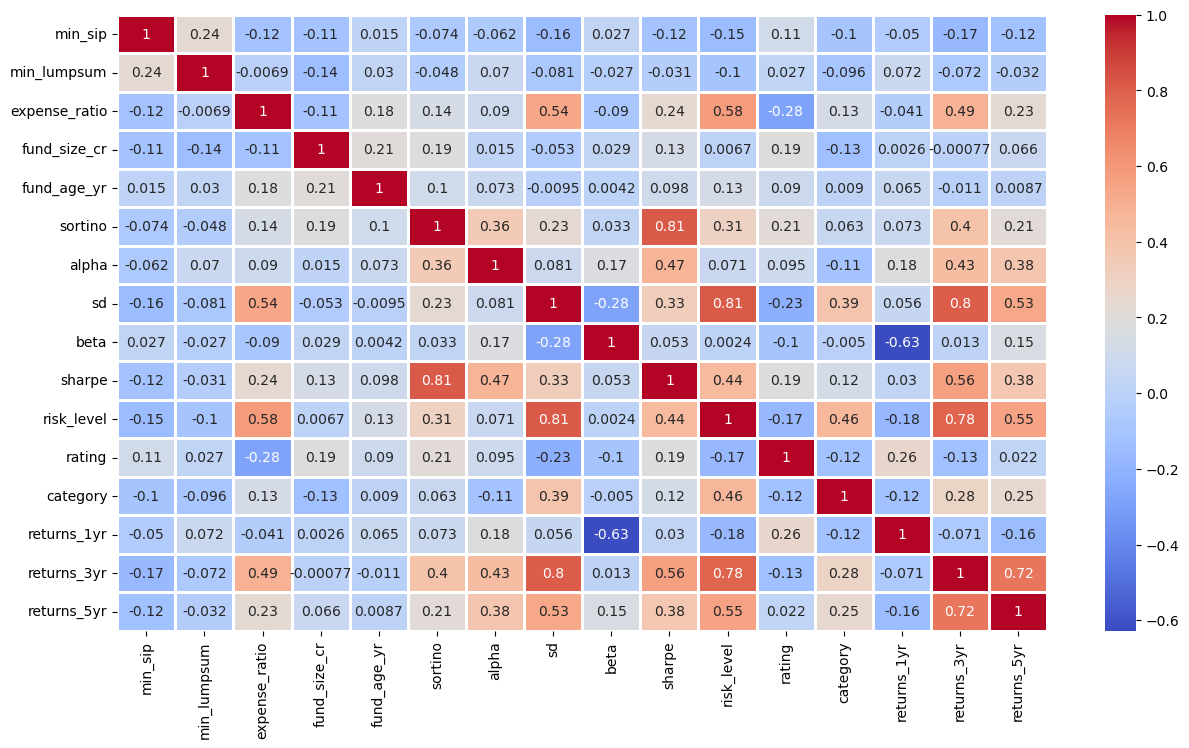

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, linewidth=0.9)
plt.show()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    int64  
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X=dataset.iloc[:,7:13].values
y=dataset.iloc[:,-2:-1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error for linear regression : ',mae)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error for linear regression : ',mse)
rmse = np.sqrt(mse)
print('Root mean squared error for linear regression : ',rmse)
r2 = r2_score(y_test, y_pred)
print('r2 score for linear regression : ',r2)

Mean absolute error for linear regression :  2.829626851209125
Mean squared error for linear regression :  21.15834722795217
Root mean squared error for linear regression :  4.599820347356206
r2 score for linear regression :  0.8472216135794322


In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
lin_reg.fit(X_train_poly, y_train)
y_pred_poly = lin_reg.predict(X_test_poly)

In [18]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print('Mean absoulte error for polynomial regression : ',mae_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean squared error for polynomial regression : ',mse_poly)
rmse_poly = np.sqrt(mse_poly)
print('Root mean squared error for polynomial regression : ',rmse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print('r2 score for polynomial regression : ',r2_poly)

Mean absoulte error for polynomial regression :  1.4967380781903257
Mean squared error for polynomial regression :  14.44733158160685
Root mean squared error for polynomial regression :  3.80096455937264
r2 score for polynomial regression :  0.8956799421362727


In [19]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
lasso_model = Lasso(alpha=0.85)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Mean squared error for lasso regression : ',mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('r2 score for lasso regression : ',r2_lasso)

Mean squared error for lasso regression :  20.778704454005975
r2 score for lasso regression :  0.8499629056943051


In [21]:
ridge_model = Ridge(alpha=1, solver='cholesky')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean square error for ridge regression : ',mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('r2 score for ridge regression : ',r2_ridge)

Mean square error for ridge regression :  21.132821082766593
r2 score for ridge regression :  0.8474059305882691


In [22]:
from sklearn.linear_model import ElasticNet
e_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
e_model.fit(X_train, y_train)
y_pred_e = e_model.predict(X_test)
mse_e=mean_squared_error(y_test, y_pred_e)
print('Mean squared error for elastic net : ',mse_e)
r2_e = r2_score(y_test, y_pred_e)
print('r2 score for elastic net : ',r2_e)

Mean squared error for elastic net :  20.73455928283091
r2 score for elastic net :  0.8502816653756604


In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train.ravel())
y_pred_sgd = sgd_model.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print('Mean squared error fo SGD : ',mse_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
print('r2 score for SGD : ',r2_sgd)

Mean squared error fo SGD :  24.04452908667172
r2 score for SGD :  0.8263813181375956


In [25]:
sgd_model_mini_batch = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.01, learning_rate='constant', eta0=0.01, max_iter=1000, shuffle=True, random_state=42)
sgd_model_mini_batch.fit(X_train, y_train.ravel())
y_pred_mini = sgd_model_mini_batch.predict(X_test)
mse_mini = mean_squared_error(y_test, y_pred_mini)
print('Mean squared error fo mini batch : ',mse_mini)
r2_mini = r2_score(y_test, y_pred_mini)
print('r2 score for mini : ',r2_mini)

Mean squared error fo mini batch :  9.80050872279465e+23
r2 score for mini :  -7.076667627380574e+21


In [26]:
sgd_model_poly = SGDRegressor()
sgd_model_poly.fit(X_train_poly, y_train.ravel())
y_pred_sgd_poly = sgd_model_poly.predict(X_test_poly)
mse_sgd_poly = mean_squared_error(y_test, y_pred_sgd_poly)
print('Mean squared error fo SGD for polynomial : ',mse_sgd_poly)
r2_sgd_poly = r2_score(y_test, y_pred_sgd_poly)
print('r2 score for SGD for polynomial : ',r2_sgd_poly)

Mean squared error fo SGD for polynomial :  4.778592347673578e+27
r2 score for SGD for polynomial :  -3.4504851459983446e+25


In [27]:
y_pred_poly

array([[ 8.35746272],
       [ 5.80368272],
       [ 6.89391638],
       [44.48115212],
       [ 5.16817087],
       [25.47776616],
       [36.21886301],
       [35.44482762],
       [27.76230333],
       [18.91311155],
       [11.47930569],
       [16.01385118],
       [ 6.30169683],
       [28.26340292],
       [ 6.24034001],
       [20.13947576],
       [40.9677027 ],
       [ 7.20196709],
       [32.64159028],
       [22.02334121],
       [ 5.28725822],
       [26.68098586],
       [57.39160377],
       [24.68377911],
       [31.65976703],
       [22.28328695],
       [ 6.39623859],
       [32.39029071],
       [ 5.08448063],
       [ 7.11427967],
       [23.93876944],
       [20.75172341],
       [35.91635134],
       [35.64636852],
       [32.02567448],
       [17.76270423],
       [20.88134854],
       [31.9566512 ],
       [36.37783035],
       [34.73144685],
       [ 5.93958917],
       [17.46401014],
       [22.59428079],
       [35.97463589],
       [ 6.01383134],
       [ 4